In [2]:
#Beer Dataset
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
beer_df = pd.read_csv("beer.csv")
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [8]:
#normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform(beer_df[["calories",
 "sodium",
"alcohol",
"cost"]])

How Many Clusters Exist?
There are 2 methods to determine this.
1. Dendrogram
2. Elbow method

Using HIERARCHICAL CLUSTERING Method 
Hierarchical clustering is a clustering algorithm which uses the following steps to develop clusters:
1. Start with each data point in a single cluster.
2. Find the data points with the shortest distance (using an appropriate distance measure) and
merge them to form a cluster.
3. Repeat step 2 until all data points are merged together to form a single cluster.

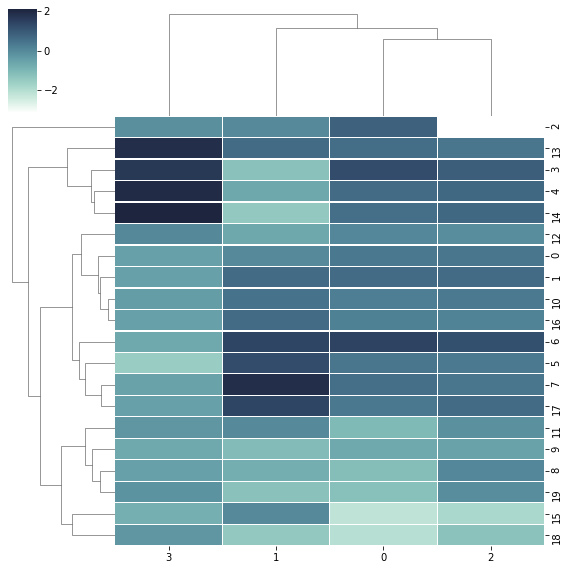

In [9]:
#using dendrogram method
import seaborn as sn
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_beer_df, cmap=cmap, linewidths=.2,
figsize = (8,8));

'''It can be observed that both the beer brands Coors and Hamms brand 10 and 18 are very similar across all features.
Similarly, brands 2 and 18 seem to be most different as the distance is highest. They are represented on
two extremes of the dendrogram.'''


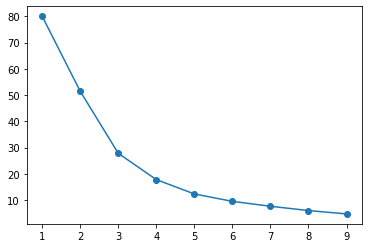

In [10]:
#using elbow method
#The following code iterates and creates clusters ranging from 1 to 10 and captures the total variance in the variable cluster_errors.
from sklearn.cluster import KMeans 
cluster_range = range(1, 10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_beer_df)
    cluster_errors.append(clusters.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(cluster_range, cluster_errors, marker = "o");

The plot indicates that the elbow point is at 3, which in turn indicates there might be three clusters
existing in the dataset. As mentioned earlier, these techniques provide only a guideline of how many clusters
may exist. Here we will discuss three clusters, but the readers can create four clusters and try to interpret them.

In [11]:
#normalizating the data
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform (beer_df[['calories',
 'sodium',
'alcohol',
'cost']])

In [12]:
#creating clusters
k = 3
clusters = KMeans(k, random_state = 42)
clusters.fit(scaled_beer_df)
beer_df['clusterid'] = clusters.labels_

#Interpreting the Clusters 

In [13]:
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,0
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0
11,Coors_Light,102,15,4.1,0.46,0
12,Michelob_Light,135,11,4.2,0.50,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
19,Schlitz_Light,97,7,4.2,0.47,0


In cluster 0, beers with medium alcohol content and medium cost are grouped together. 
This is the largest segment and may be targeting the largest segment of customers.

In [14]:
beer_df[beer_df.clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
10,Coors,140,18,4.6,0.44,1
16,Hamms,139,19,4.4,0.43,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1


In cluster 1, all the light beers with low calories and sodium content are clustered into one group. This
must be addressing the customer segment who wants to drink but are also calorie conscious.

In [15]:
beer_df[beer_df.clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


These are expensive beers with relatively high alcohol content. Also, the sodium content is low. The costs
are high because the target customers could be brand sensitive and the brands are promoted as premium
brands.

#HIERARCHICAL CLUSTERING

Hierarchical clustering is a clustering algorithm which uses the following steps to develop clusters:
1. Start with each data point in a single cluster.
2. Find the data points with the shortest distance (using an appropriate distance measure) and
merge them to form a cluster.
3. Repeat step 2 until all data points are merged together to form a single cluster.

In [16]:
from sklearn.cluster import AgglomerativeClustering
#We will create clusters using AgglomerativeClustering and store the new cluster labels in h_clusterid variable.
h_clusters = AgglomerativeClustering(3)
h_clusters.fit(scaled_beer_df)
beer_df['h_clusterid'] = h_clusters.labels_

In [17]:
#Compare the Clusters Created by K-Means and Hierarchical Clustering


In [18]:
beer_df[beer_df.h_clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
2,Lowenbrau,157,15,0.9,0.48,0,0
8,Miller_Lite,99,10,4.3,0.43,0,0
9,Budweiser_Light,113,8,3.7,0.40,0,0
11,Coors_Light,102,15,4.1,0.46,0,0
12,Michelob_Light,135,11,4.2,0.50,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0,0
19,Schlitz_Light,97,7,4.2,0.47,0,0


In [19]:
beer_df[beer_df.h_clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
0,Budweiser,144,15,4.7,0.43,1,1
1,Schlitz,151,19,4.9,0.43,1,1
5,Old_Milwaukee,145,23,4.6,0.28,1,1
6,Augsberger,175,24,5.5,0.40,1,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,1
10,Coors,140,18,4.6,0.44,1,1
16,Hamms,139,19,4.4,0.43,1,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1,1


In [20]:
beer_df[beer_df.h_clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
3,Kronenbourg,170,7,5.2,0.73,2,2
4,Heineken,152,11,5.0,0.77,2,2
13,Becks,150,19,4.7,0.76,2,2
14,Kirin,149,6,5.0,0.79,2,2


Conclusion: Both the clustering algorithms have created similar clusters. Only cluster ids have changed.